In [ ]:
# Install libraries for Website (Streamlit), AI (Transformers), and Graphs (Seaborn)
!pip install streamlit pandas scikit-learn transformers torch matplotlib seaborn pyngrok -q

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline

In [ ]:
# Load the dataset
try:
    df = pd.read_csv("megaGymDataset.csv")
    print("✅ Success: Dataset loaded!")
    print(f"Total Rows: {len(df)}")
except FileNotFoundError:
    print("❌ Error: Please upload 'megaGymDataset.csv' to the Colab files.")

✅ Success: Dataset loaded!
Total Rows: 2918


In [ ]:
# 1. Show raw data (Top 5 rows)
print("--- RAW DATA PREVIEW ---")
display(df.head())

--- RAW DATA PREVIEW ---


,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [ ]:
# 2. Check for missing values
null_count = df.isnull().sum().sum()
print(f"\nTotal Null Values Before Cleaning: {null_count}")


Total Null Values Before Cleaning: 5525


In [ ]:
# 3. Clean the data (Drop rows with missing values)
if null_count > 0:
    df.dropna(inplace=True)
    print(f"✅ Removed {null_count} empty values. Data is clean.")
else:
    print("✅ Data is already clean.")

✅ Removed 5525 empty values. Data is clean.


In [ ]:
# 4. Verify cleaning
print(f"Total Null Values After Cleaning: {df.isnull().sum().sum()}")

Total Null Values After Cleaning: 0


/tmp/ipython-input-3618530025.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='BodyPart', data=df, order=top_body_parts, palette='viridis')


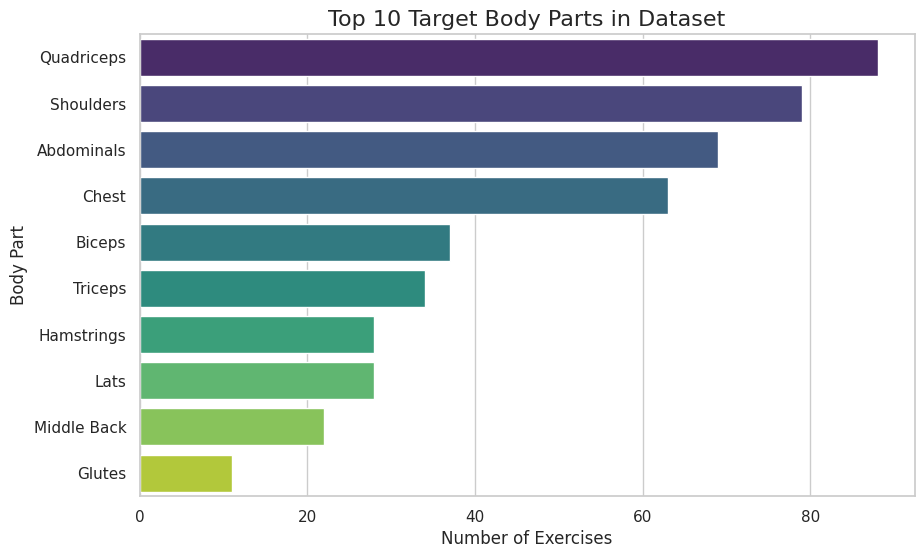

In [ ]:
# Set visual style
sns.set(style="whitegrid")

# Create a Bar Chart: Distribution of Exercises by Body Part
plt.figure(figsize=(10, 6))
# Count top 10 body parts
top_body_parts = df['BodyPart'].value_counts().index[:10]
sns.countplot(y='BodyPart', data=df, order=top_body_parts, palette='viridis')

plt.title('Top 10 Target Body Parts in Dataset', fontsize=16)
plt.xlabel('Number of Exercises', fontsize=12)
plt.ylabel('Body Part', fontsize=12)
plt.show()

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline

# --- SETUP ---
st.set_page_config(page_title="AI Fitness", page_icon="💪", layout="wide")

@st.cache_data
def load_data():
    try:
        df = pd.read_csv("megaGymDataset.csv")
        df.dropna(inplace=True)
        return df
    except:
        return None

@st.cache_resource
def load_model():
    return pipeline('text-generation', model='distilgpt2')

df = load_data()
ai_generator = load_model()

# --- UI ---
st.title("💪 AI-Powered Personal Fitness Planner")
st.markdown("### Project: Kaggle Data Analysis + Hugging Face AI")

# --- DATA REPORT ---
with st.expander("📊 View Data Analysis Report", expanded=True):
    if df is not None:
        col1, col2 = st.columns([1, 1]) # Equal width columns
        with col1:
            st.write("**Cleaned Data (First 15 Rows):**")
            # CHANGED: Now showing 15 rows
            st.dataframe(df.head(15), height=400)
        with col2:
            st.write("**Top 7 Body Parts Distribution:**")
            # CHANGED: Now showing Top 7 and slightly taller graph
            fig, ax = plt.subplots(figsize=(6, 5))
            sns.countplot(y='BodyPart', data=df, order=df['BodyPart'].value_counts().index[:7], ax=ax, palette='magma')
            st.pyplot(fig)

st.markdown("---")

# --- AI APP ---
st.header("🤖 Your Personal AI Coach")
goal = st.sidebar.selectbox("Goal", ["Muscle Gain", "Weight Loss", "Strength"])
target_part = st.sidebar.selectbox("Target Muscle", df['BodyPart'].unique())

col1, col2 = st.columns(2)
with col1:
    st.subheader(f"Exercises for {target_part}")

    # Filter Logic with Error Handling
    filtered_data = df[df['BodyPart'] == target_part]
    count = len(filtered_data)

    if count > 0:
        sample_size = min(5, count)
        st.table(filtered_data.sample(sample_size)[['Title', 'Type', 'Equipment']])
    else:
        st.warning(f"No exercises found for {target_part}!")

with col2:
    st.subheader("🧠 AI Motivation")
    if st.button("Get AI Advice"):
        with st.spinner("AI is thinking..."):
            prompt = f"To achieve {goal}, the most important mindset is"
            res = ai_generator(prompt, max_length=40, num_return_sequences=1)
            st.success(f"'{res[0]['generated_text']}'")

Overwriting app.py


### Mount Google Drive

First, you need to mount your Google Drive to access its files. This will open an authentication window in your browser.

### Load a CSV file from Google Drive

After mounting, you can specify the path to your file in Google Drive. Replace `'Your_File_Path_Here.csv'` with the actual path to your CSV file.

In [ ]:
import pandas as pd

# Replace 'Your_File_Path_Here.csv' with the actual path to your CSV file in Google Drive
try:
    df_from_drive = pd.read_csv('/content/megaGymDataset.csv')
    print('✅ Success: Dataset loaded from Google Drive!')
    display(df_from_drive.head())
except FileNotFoundError:
    print('❌ Error: File not found. Please ensure the path is correct and the file exists.')
except Exception as e:
    print(f'An error occurred: {e}')

✅ Success: Dataset loaded from Google Drive!


,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [ ]:
from pyngrok import ngrok

# 1. AUTHENTICATE
# REPLACE THE TEXT BELOW WITH YOUR ACTUAL TOKEN FROM NGROK DASHBOARD
ngrok.set_auth_token("37ezIi02DOQJxoEMx4a8ushvnHV_2126RKUmiTh9ZWFDpESDA")

# 2. START TUNNEL
public_url = ngrok.connect(8501).public_url
print(f"🚀 CLICK THIS LINK: {public_url}")

# 3. RUN APP
!streamlit run app.py

🚀 CLICK THIS LINK: https://dervishlike-charlene-tawdrily.ngrok-free.dev



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.85.202.110:8501

2026-01-01 14:56:34.566041: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767279394.594035   13356 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767279394.602256   13356 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767279394.623672   13356 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:17